In [1]:
%config Completer.use_jedi=False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("loan_data.csv")
data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

<AxesSubplot:>

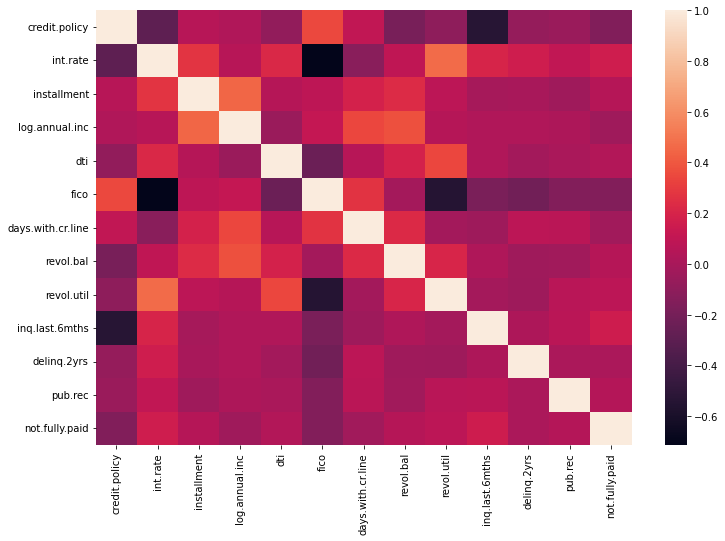

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

In [5]:
data.corr()['not.fully.paid']

credit.policy       -0.158119
int.rate             0.159552
installment          0.049955
log.annual.inc      -0.033439
dti                  0.037362
fico                -0.149666
days.with.cr.line   -0.029237
revol.bal            0.053699
revol.util           0.082088
inq.last.6mths       0.149452
delinq.2yrs          0.008881
pub.rec              0.048634
not.fully.paid       1.000000
Name: not.fully.paid, dtype: float64

In [6]:
#Our Target is "not.fully.paid", From the below EDA from Pandas profiling, we could see that there is problem of multi collinearity. 
#From the above correlation matrix, we can also understand that target is more correlated positively with 
#'int.rate-0.16' and 'inq.last.6mths - 0.15'.

#But they are inturn highly correlated with other columns 
#-> int.rate & credit.policy
#-> inq.last.6mths & fico

In [7]:
df = pd.get_dummies(data, columns=['purpose'], drop_first=True)
df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [8]:
from pandas_profiling import ProfileReport

In [9]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.corr()

credit.policy  int.rate  installment  \
credit.policy                    1.000000 -0.294089     0.058770   
int.rate                        -0.294089  1.000000     0.276140   
installment                      0.058770  0.276140     1.000000   
log.annual.inc                   0.034906  0.056383     0.448102   
dti                             -0.090901  0.220006     0.050202   
fico                             0.348319 -0.714821     0.086039   
days.with.cr.line                0.099026 -0.124022     0.183297   
revol.bal                       -0.187518  0.092527     0.233625   
revol.util                      -0.104095  0.464837     0.081356   
inq.last.6mths                  -0.535511  0.202780    -0.010419   
delinq.2yrs                     -0.076318  0.156079    -0.004368   
pub.rec                         -0.054243  0.098162    -0.032760   
not.fully.paid                  -0.158119  0.159552     0.049955   
purpose_credit_card              0.003216 -0.042109     0.000774   
purpose_debt_consolidation       0.020193  0.123607     0.161658   
purpose_educational             -0.031346 -0.019618    -0.094510   
purpose_home_improvement         0.006036 -0.050697     0.023024   
purpose_major_purchase           0.024281 -0.068978    -0.079836   
purpose_small_business          -0.003511  0.151247     0.145654   

                            log.annual.inc       dti      fico  \
credit.policy                     0.034906 -0.090901  0.348319   
int.rate                          0.056383  0.220006 -0.714821   
installment                       0.448102  0.050202  0.086039   
log.annual.inc                    1.000000 -0.054065  0.114576   
dti                              -0.054065  1.000000 -0.241191   
fico                              0.114576 -0.241191  1.000000   
days.with.cr.line                 0.336896  0.060101  0.263880   
revol.bal                         0.372140  0.188748 -0.015553   
revol.util                        0.054881  0.337109 -0.541289   
inq.last.6mths                    0.029171  0.029189 -0.185293   
delinq.2yrs                       0.029203 -0.021792 -0.216340   
pub.rec                           0.016506  0.006209 -0.147592   
not.fully.paid                   -0.033439  0.037362 -0.149666   
purpose_credit_card               0.072942  0.084476 -0.012512   
purpose_debt_consolidation       -0.026214  0.179149 -0.154132   
purpose_educational              -0.119799 -0.035325 -0.013012   
purpose_home_improvement          0.116375 -0.092788  0.097474   
purpose_major_purchase           -0.031020 -0.077719  0.067129   
purpose_small_business            0.091540 -0.069245  0.063292   

                            days.with.cr.line  revol.bal  revol.util  \
credit.policy                        0.099026  -0.187518   -0.104095   
int.rate                            -0.124022   0.092527    0.464837   
installment                          0.183297   0.233625    0.081356   
log.annual.inc                       0.336896   0.372140    0.054881   
dti                                  0.060101   0.188748    0.337109   
fico                                 0.263880  -0.015553   -0.541289   
days.with.cr.line                    1.000000   0.229344   -0.024239   
revol.bal                            0.229344   1.000000    0.203779   
revol.util                          -0.024239   0.203779    1.000000   
inq.last.6mths                      -0.041736   0.022394   -0.013880   
delinq.2yrs                          0.081374  -0.033243   -0.042740   
pub.rec                              0.071826  -0.031010    0.066717   
not.fully.paid                      -0.029237   0.053699    0.082088   
purpose_credit_card                  0.046220   0.072316    0.091321   
purpose_debt_consolidation          -0.009318   0.005785    0.211869   
purpose_educational                 -0.042621  -0.034743   -0.053128   
purpose_home_improvement             0.068087   0.003258   -0.114449   
purpose_major_purchase              -0.020561  -0.

In [11]:
df.corr()['not.fully.paid']

credit.policy                -0.158119
int.rate                      0.159552
installment                   0.049955
log.annual.inc               -0.033439
dti                           0.037362
fico                         -0.149666
days.with.cr.line            -0.029237
revol.bal                     0.053699
revol.util                    0.082088
inq.last.6mths                0.149452
delinq.2yrs                   0.008881
pub.rec                       0.048634
not.fully.paid                1.000000
purpose_credit_card          -0.047136
purpose_debt_consolidation   -0.017543
purpose_educational           0.021609
purpose_home_improvement      0.007272
purpose_major_purchase       -0.028580
purpose_small_business        0.084460
Name: not.fully.paid, dtype: float64

In [12]:
#**Insights:**
#1. Our Target is "not.fully.paid", From the below EDA from Pandas profiling, we could see that there is problem of multi collinearity. 
#From the above correlation matrix, we can also understand that target is more correlated positively with 
#'int.rate-0.16' and 'inq.last.6mths - 0.15'.

#But they are inturn highly correlated with other columns 
#-> int.rate & fico 
#-> inq.last.6mths & credit policy

#2. The fields inq.last.6mths has 88.3 % zeroes and pub.rec has 94.2% zeroes. SO, they can be dropped off from our modelling


In [13]:
#Dropping 2 cols having more zeroes

df.drop(['inq.last.6mths','pub.rec'],axis=1)

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  delinq.2yrs  not.fully.paid  \
0           5639.958333      28854        52.1            0               0   
1           2760.000000      33623        76.7            0               0   
2           4710.000000       3511        25.6            0               0   
3           2699.958333      33667        73.2            0               0   
4           4066.000000       4740        39.5            1               0   
...                 ...        ...         ...          ...             ...   
9573       10474.000000     215372        82.1            0               1   
9574        4380.000000        184         1.1            0               1   
9575        3450.041667      10036        82.9            0               1   
9576        1800.000000          0         3.2            0               1   
9577        4740.000000      37879        57.0            0               1   

      purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                       0                           1                    0   
1                       1                           0                    0   
2                       0                           1                    0   
3                       0                           1                    0   
4                       1                           0                    0   
...                   ...                         ...                  ...   
9573                    0                           0                    0   
9574                    0                           0                    0   
9575                    0                           1                    0   
9576                    0                           0                    0   
9577                    0                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9573                         0                       0                       0  
9574                         0                       0                       0  
9575                         0                       0                       0  
9576                         1                       0                       0  
9577                         0                       0                       0  

[9578 rows x 17 columns]

In [14]:
#Dropping 2 cols to avoid multi collinearity

df.drop(['fico','credit.policy'],axis=1)

int.rate  installment  log.annual.inc    dti  days.with.cr.line  \
0       0.1189       829.10       11.350407  19.48        5639.958333   
1       0.1071       228.22       11.082143  14.29        2760.000000   
2       0.1357       366.86       10.373491  11.63        4710.000000   
3       0.1008       162.34       11.350407   8.10        2699.958333   
4       0.1426       102.92       11.299732  14.97        4066.000000   
...        ...          ...             ...    ...                ...   
9573    0.1461       344.76       12.180755  10.39       10474.000000   
9574    0.1253       257.70       11.141862   0.21        4380.000000   
9575    0.1071        97.81       10.596635  13.09        3450.041667   
9576    0.1600       351.58       10.819778  19.18        1800.000000   
9577    0.1392       853.43       11.264464  16.28        4740.000000   

      revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  \
0         28854        52.1               0            0        0   
1         33623        76.7               0            0        0   
2          3511        25.6               1            0        0   
3         33667        73.2               1            0        0   
4          4740        39.5               0            1        0   
...         ...         ...             ...          ...      ...   
9573     215372        82.1               2            0        0   
9574        184         1.1               5            0        0   
9575      10036        82.9               8            0        0   
9576          0         3.2               5            0        0   
9577      37879        57.0               6            0        0   

      not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0                  0                    0                           1   
1                  0                    1                           0   
2                  0                    0                           1   
3                  0                    0                           1   
4                  0                    1                           0   
...              ...                  ...                         ...   
9573               1                    0                           0   
9574               1                    0                           0   
9575               1                    0                           1   
9576               1                    0                           0   
9577               1                    0                           1   

      purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                       0                         0                       0   
1                       0                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         0                       0   
...                   ...                       ...                     ...   
9573                    0                         0                       0   
9574                    0                         0                       0   
9575                    0                         0                       0   
9576                    0                         1                       0   
9577                    0                         0                       0   

      purpose_small_business  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
9573                       0  
9574                       0  
9575                       0  
9576                       0  
9577                       0  

[9578 rows x 17 columns]

In [15]:
x= df.drop(['not.fully.paid'],axis=1)
y=df['not.fully.paid']

In [16]:
x.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  purpose_credit_card  purpose_debt_consolidation  \
0        0                    0                           1   
1        0                    1                           0   
2        0                    0                           1   
3        0                    0                           1   
4        0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [18]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [19]:
#standardise the data
from sklearn.preprocessing import StandardScaler

In [20]:
stdSc=StandardScaler()
stdSc.fit(x_train)

StandardScaler()

In [21]:
x_train_std=stdSc.transform(x_train)
x_test_std=stdSc.transform(x_test)

In [22]:
# Build Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [23]:
model=Sequential()
#hidden layer
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid')) # for binary classification we use SIGMOID only as activation at output

model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [24]:
from livelossplot.inputs.tf_keras import PlotLossesCallback

In [25]:
#pip install tensorflow==2.1

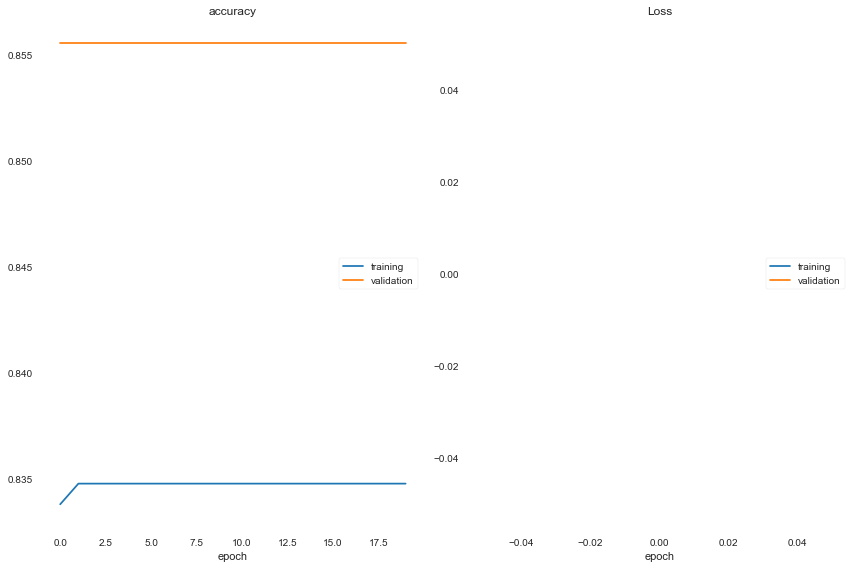

accuracy
	training         	 (min:    0.834, max:    0.835, cur:    0.835)
	validation       	 (min:    0.856, max:    0.856, cur:    0.856)
Loss
	training         	 (min:      nan, max:      nan, cur:      nan)
	validation       	 (min:      nan, max:      nan, cur:      nan)
225/225 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8347 - val_loss: nan - val_accuracy: 0.8555


In [26]:
model.fit(x_train_std,y_train,epochs=20,callbacks=[PlotLossesCallback()],validation_data=(x_test_std,y_test))

In [27]:
# So here we can see the accuracy as almost 84%

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________


In [29]:
print(x_train.shape)
print(y_train.shape)

(7183, 18)
(7183,)


In [30]:
print(x_test.shape)
print(y_test.shape)

(2395, 18)
(2395,)
